In [2]:
# Mutual information between two variables is a measure of the extent to which
# knowledge of one variable reduces uncertainty about the other

import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.dpi'] = 300
sns.set_theme(font_scale = 0.75)
sns.set_style('whitegrid')


accidents_df = pd.read_csv('./data/accidents.csv')
autos_df = pd.read_csv('./data/autos.csv')
concrete_df = pd.read_csv('./data/concrete.csv')
customer_df = pd.read_csv('./data/customer.csv')

In [4]:
autos_df['stroke_ratio'] = autos_df['stroke'] / autos_df['bore']

autos_df[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [5]:
autos_df['displacement'] = (
    np.pi * ((0.5 * autos_df['bore']) ** 2) * autos_df['stroke'] * autos_df['num_of_cylinders']
)

<AxesSubplot:xlabel='WindSpeed', ylabel='Density'>

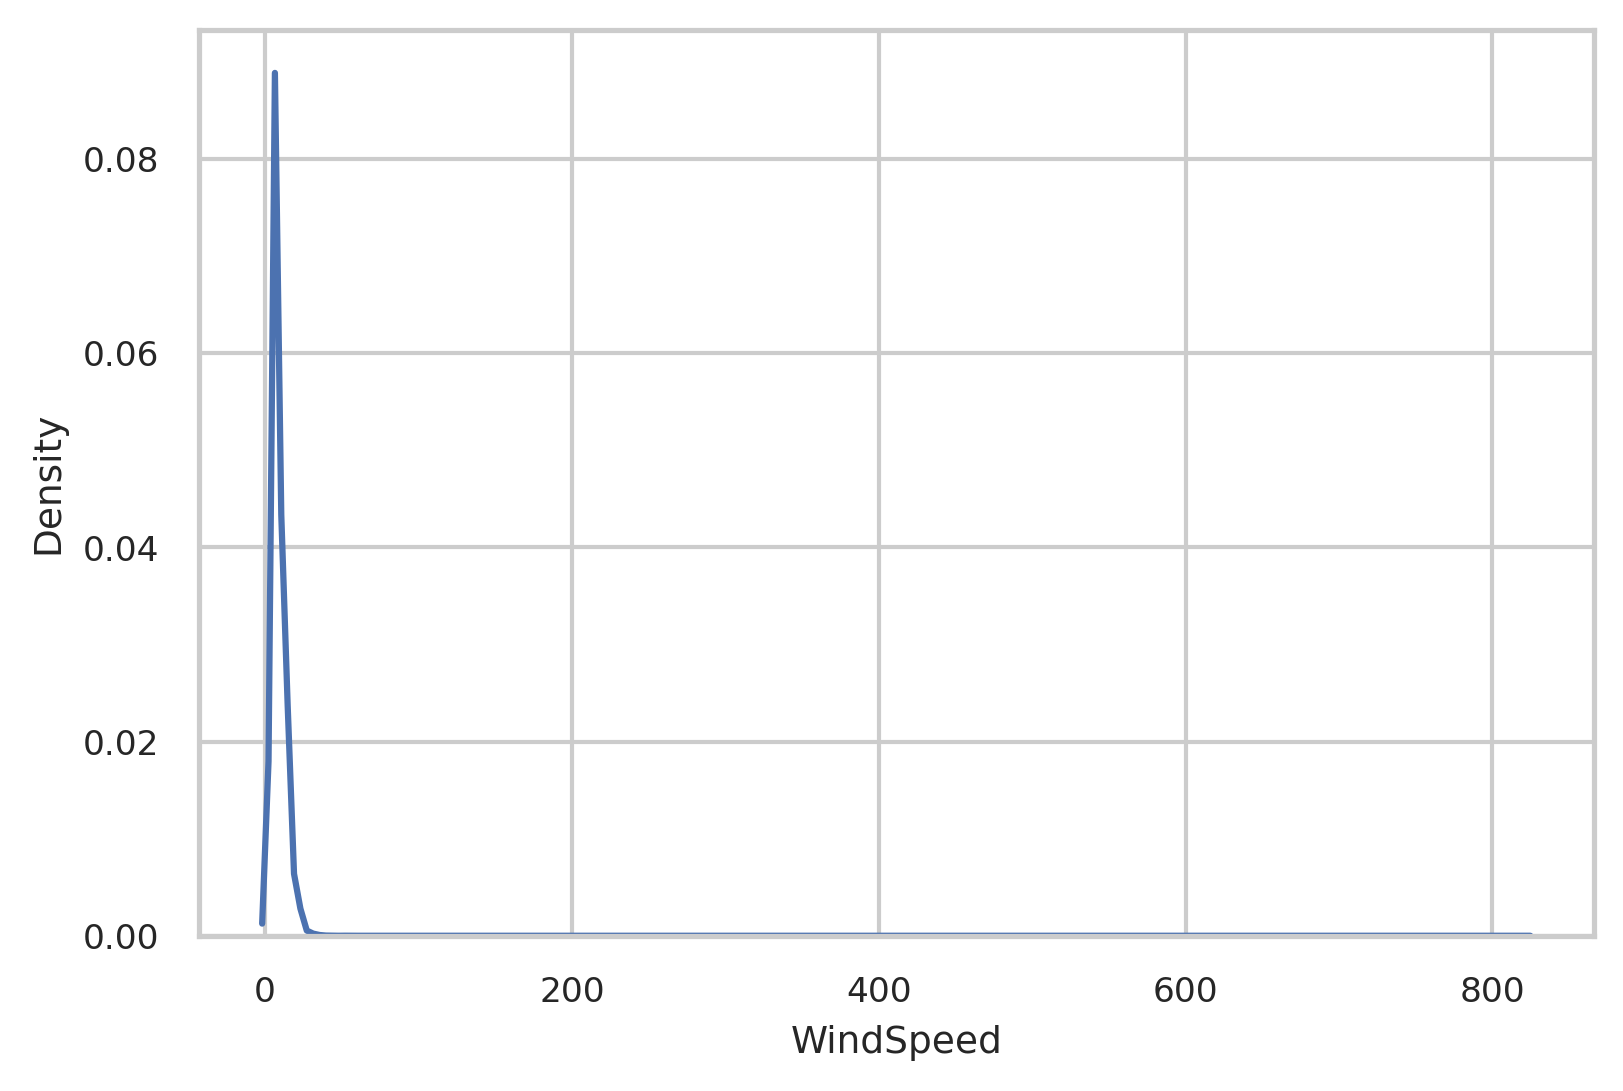

In [10]:
sns.kdeplot(data = accidents_df['WindSpeed'])

<AxesSubplot:xlabel='WindSpeed', ylabel='Density'>

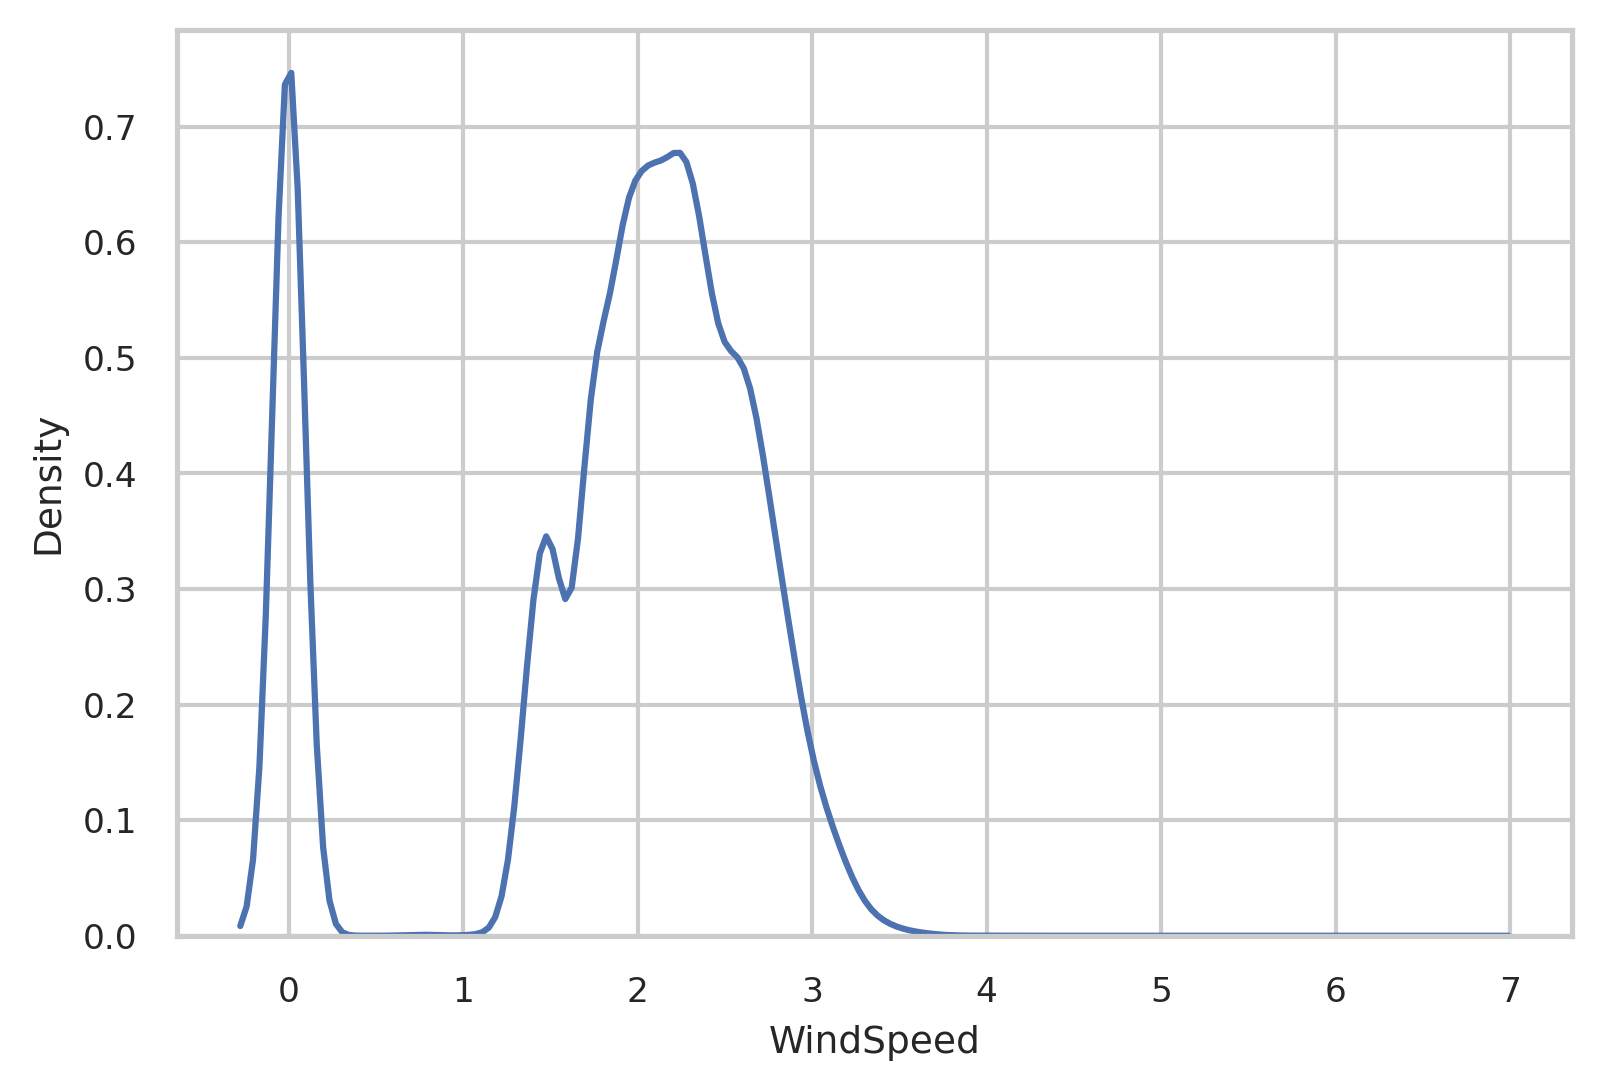

In [11]:
sns.kdeplot(data = accidents_df['WindSpeed'].apply(np.log1p))

In [12]:
roadway_features = [
    "Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"
]

accidents_df['RoadwayFeatures'] = accidents_df[roadway_features].sum(axis = 1)

accidents_df[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [13]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

concrete_df['no_of_components'] = concrete_df[components].gt(0).sum(axis = 1)

concrete_df[components + ['no_of_components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,no_of_components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [14]:
customer_df.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [16]:
customer_df[['type', 'level']] = (
    customer_df['Policy'].str.split(" ", expand = True)
)

customer_df[['Policy', 'type', 'level']].head(10)

,Policy,type,level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [17]:
autos_df['make_and_style'] = autos_df['make'] + "_" + autos_df['body_style']

autos_df[['make', 'body_style', 'make_and_style']].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [20]:
customer_df['AverageIncome'] = (
    customer_df.groupby('State')['Income'].transform('mean')
)

customer_df[['State', 'Income', 'AverageIncome']].head()

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083


In [23]:
customer_df['StateFreq'] = (
    customer_df.groupby('State')['State'].transform('count') / customer_df['State'].count()
)

customer_df[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [ ]:
df_train = customer_df.sample(frac = 0.5)
df_valid = customer_df.drop(df_train.index)

df_train['AverageClaim'] = df_train.groupby('Coverage')['ClaimAmount'].transform('mean')

df_valid = df_valid.merge(
    df_train[['Coverage', 'AverageClaim']].drop_duplicates(),
    on = 'Coverage',
    how = 'left',
)

df_valid[['Coverage', 'AverageClaim']].head(10)